### Load libraries

In [1]:
# Load libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

### Load Data

In [2]:
for dirname, _, filenames in os.walk('../input/iris-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/iris-dataset/Iris.csv


In [3]:
file_path = '../input/iris-dataset'             # Store base directory path in Python variable
file_name = 'Iris.csv'  

In [4]:
cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

In [5]:
# Load the csv into Pandas DataFrame
iris = pd.read_csv(os.path.join(file_path,file_name),names = cols, skiprows=1)

In [6]:
#preview data    
print(iris.head(15))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0             5.1           3.5            1.4           0.2  Iris-setosa
1             4.9           3.0            1.4           0.2  Iris-setosa
2             4.7           3.2            1.3           0.2  Iris-setosa
3             4.6           3.1            1.5           0.2  Iris-setosa
4             5.0           3.6            1.4           0.2  Iris-setosa
5             5.4           3.9            1.7           0.4  Iris-setosa
6             4.6           3.4            1.4           0.3  Iris-setosa
7             5.0           3.4            1.5           0.2  Iris-setosa
8             4.4           2.9            1.4           0.2  Iris-setosa
9             4.9           3.1            1.5           0.1  Iris-setosa
10            5.4           3.7            1.5           0.2  Iris-setosa
11            4.8           3.4            1.6           0.2  Iris-setosa
12            4.8           3.0       

In [7]:
print(iris.shape)

(150, 5)


In [8]:
print(iris.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [9]:
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Histogram

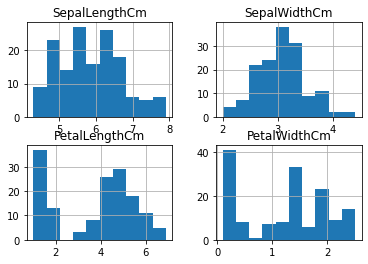

In [10]:
iris.hist()
plt.show()

### Data visualization

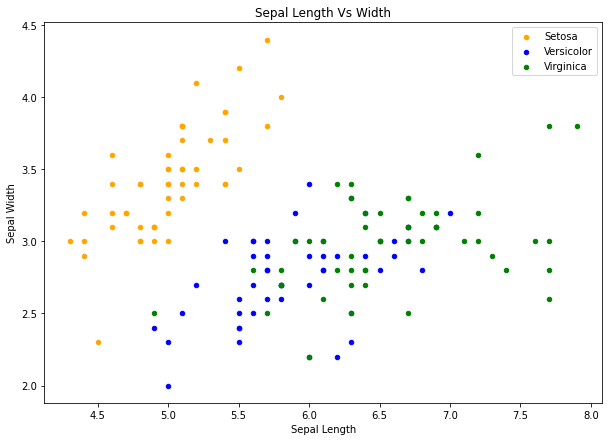

In [11]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

As we can observe, different flowers have Sepal Width and Sepal Length. Let us continue so further analysis.

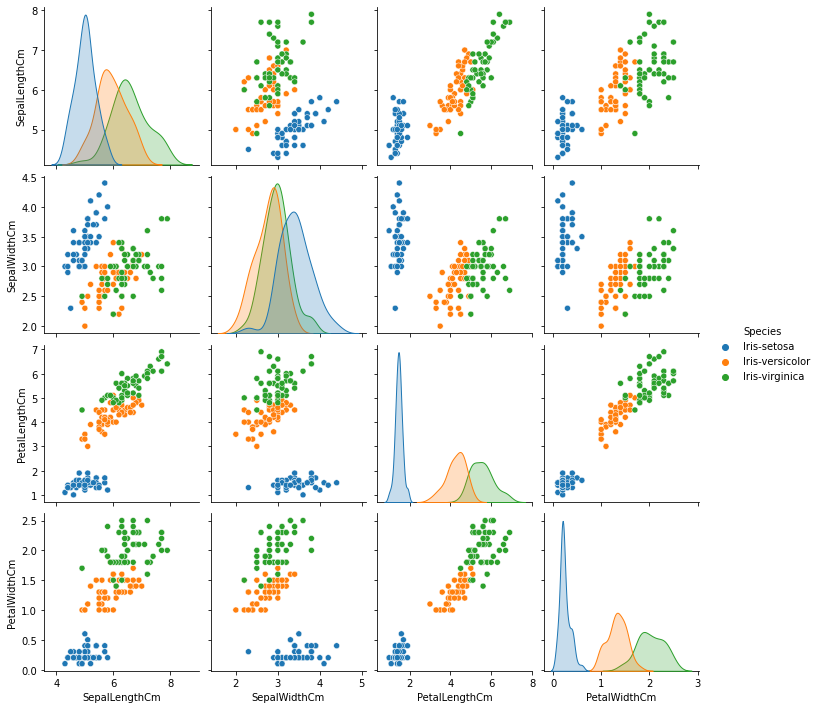

In [12]:
# Visualize the whole dataset
sns.pairplot(iris, hue='Species')

From this visualization, we can tell that iris-setosa is well separated from the other two flowers.
And iris virginica is the longest flower and iris setosa is the shortest.

SepalLengthCm       AxesSubplot(0.125,0.536818;0.133621x0.343182)
SepalWidthCm     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
PetalLengthCm     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
PetalWidthCm     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
dtype: object

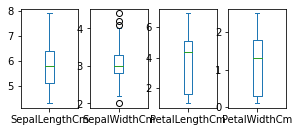

In [13]:
iris.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

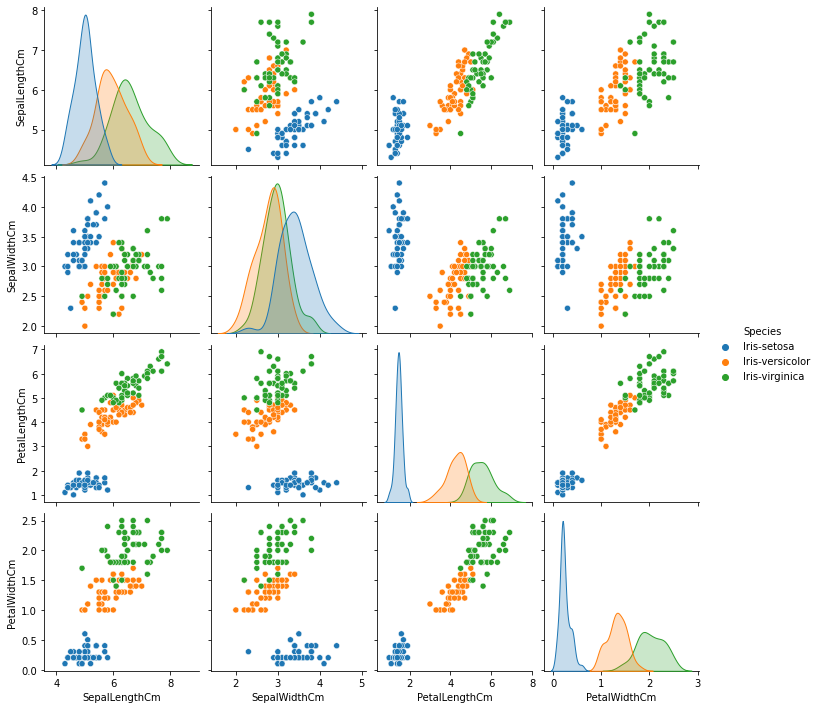

In [14]:
sns.pairplot(iris,hue='Species');

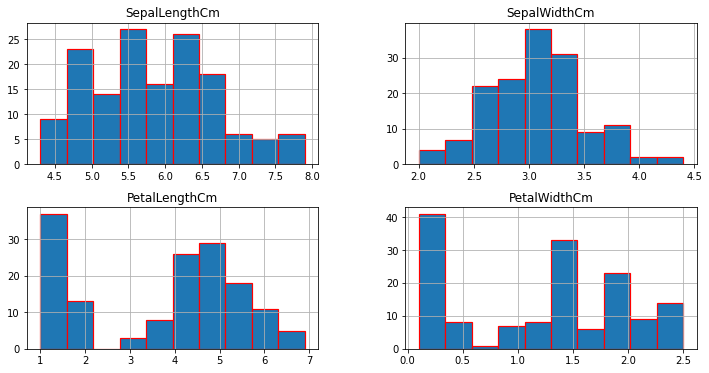

In [15]:
iris.hist(edgecolor='red', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

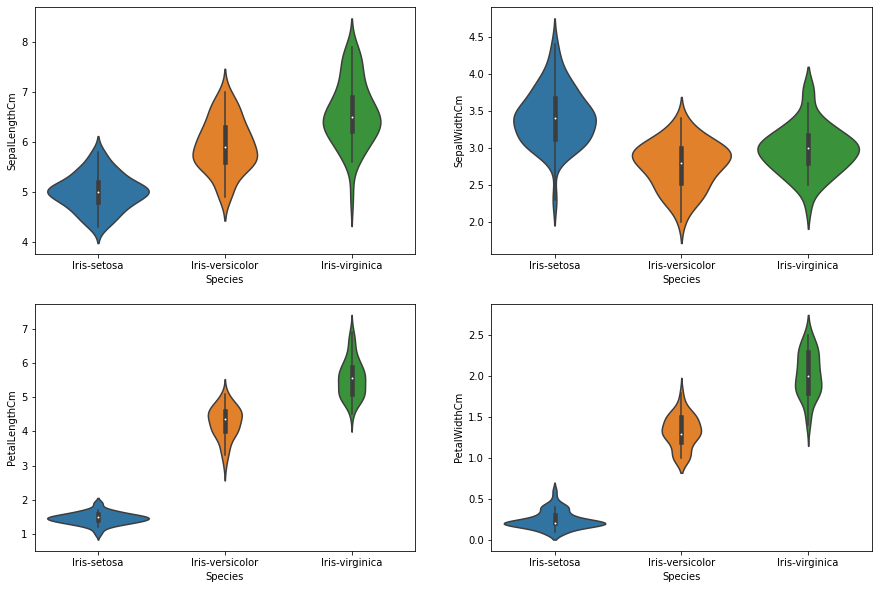

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)
plt.savefig('violionplot.jpeg')

In [17]:
#Correlation 
corr_mat = iris.corr()
print(corr_mat)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


### Splitting the iris dataset

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [19]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

Now that data has been split, let import relevant classification models

In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

### SVM (Support Vector Machine)
The first model we are going to test the SVM Classifier

In [21]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 0.9777777777777777


### K – Nearest Neighbour (KNN)


In [22]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9777777777777777


### Decision Tree

In [23]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9777777777777777


### Navia bayes

In [24]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.9555555555555556


### confusion matrix

In [25]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,pred_y)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,pred_y))

Confusion matrix: 
 [[11  0  0]
 [ 0 15  0]
 [ 0  1 18]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.95      0.97        19

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [26]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.97,0.93,0.97,0.95]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.97,Support Vector Machines
0.97,KNN
0.95,Decision Tree
0.93,Naive Bayes
